In [123]:
import pandas as pd
from scipy.spatial import cKDTree
import numpy as np
import geopandas as gpd
import statsmodels.api as sm

In [98]:
# Einlesen der Daten
didok = pd.read_csv("Data/didok.csv", sep=";")
wege_freizeit_erweitert = pd.read_csv(
    "generated_data/wege_freizeit_erweitert.csv", sep=";"
)
etappen_freizeit_erweitert = pd.read_csv(
    "generated_data/etappen_freizeit_erweitert.csv", sep=";"
)

In [99]:
didok.head()

,lod,Geoposition,﻿numberShort,uicCountryCode,sloid,number,validFrom,validTo,designationOfficial,designationLong,...,businessOrganisation,businessOrganisationNumber,businessOrganisationAbbreviationDe,businessOrganisationAbbreviationFr,businessOrganisationDescriptionDe,businessOrganisationDescriptionFr,fotComment,height,creationDate,editionDate
0,http://lod.opentransportdata.swiss/didok/bpuic,"49.57723600979744, 10.588775009219152",10507,11,ch:1:sloid:1110507,1110507,2022-12-11,2099-12-31,"Neustadt (Aisch), Bahnhof",NaN,...,ch:1:sboid:101257,9988,INFOPLUS,INFOPLUS,Fiktive GO für Infoplus,Fiktive GO für Infoplus,NaN,0.0,2023-04-25T22:59:46+02:00,2023-10-11T16:56:52+02:00
1,http://lod.opentransportdata.swiss/didok/bpuic,"52.281669008914854, 10.576396007454766",10577,11,ch:1:sloid:1110577,1110577,2022-12-11,2099-12-31,"Braunschweig, Petzvalstrasse",NaN,...,ch:1:sboid:101257,9988,INFOPLUS,INFOPLUS,Fiktive GO für Infoplus,Fiktive GO für Infoplus,NaN,0.0,2023-06-06T10:32:35+02:00,2023-10-11T16:56:52+02:00
2,http://lod.opentransportdata.swiss/didok/bpuic,"50.37017301038644, 8.468945007169054",10563,11,ch:1:sloid:1110563,1110563,2022-12-11,2099-12-31,"Hundstadt, Ortsmitte",NaN,...,ch:1:sboid:101257,9988,INFOPLUS,INFOPLUS,Fiktive GO für Infoplus,Fiktive GO für Infoplus,NaN,0.0,2023-06-01T17:06:35+02:00,2023-10-11T16:56:52+02:00
3,http://lod.opentransportdata.swiss/didok/bpuic,"48.71780001021133, 9.402911008637096",10564,11,ch:1:sloid:1110564,1110564,2022-12-11,2099-12-31,"Plochingen, Werk",NaN,...,ch:1:sboid:101257,9988,INFOPLUS,INFOPLUS,Fiktive GO für Infoplus,Fiktive GO für Infoplus,NaN,0.0,2023-06-01T17:09:30+02:00,2023-10-11T16:56:52+02:00
4,http://lod.opentransportdata.swiss/didok/bpuic,"48.20742701066016, 7.683645007305404",10581,11,ch:1:sloid:1110581,1110581,2023-06-06,2099-12-31,"Weisweil (Brsg), Mühlenstrasse",NaN,...,ch:1:sboid:101257,9988,INFOPLUS,INFOPLUS,Fiktive GO für Infoplus,Fiktive GO für Infoplus,NaN,0.0,2023-06-06T10:36:16+02:00,2023-10-11T16:56:52+02:00


In [100]:
wege_freizeit_erweitert.head()

,HHNR,Wegnummer,Distanz_km,Emissionen,Verkehrsmittel,Etappennummer,Verkehrsmittel_first,Zweck,Distanz_km_first,Start_X,...,Wohnort Y-Koordinate,W_ORT,Wohnort: PLZ,Wohnort: Kanton,Führerausweis_PW,Führerausweis_Motorrad,Start_X-Koordinate_y,Start_Y-Koordinate_y,Ziel_X-Koordinate_y,Ziel_Y-Koordinate_y
0,110001,4,3.973,512.21027,Auto,4,Auto,8,3.973,6.559870,...,46.549366,Bussigny,1030,Vaud,True,True,6.559870,46.549366,6.552598,46.568205
1,110001,6,0.404,52.08481,Auto,6,Auto,8,0.404,6.554009,...,46.549366,Bussigny,1030,Vaud,True,True,6.554009,46.540095,6.554009,46.540095
2,110008,1,5.778,0.00000,Zu Fuss,1,Zu Fuss,8,5.778,6.635652,...,46.785591,Yverdon-les-Bains,1400,Vaud,True,True,6.635652,46.785591,6.635652,46.785591
3,110008,4,3.262,0.00000,Zu Fuss,4,Zu Fuss,8,3.262,6.635652,...,46.785591,Yverdon-les-Bains,1400,Vaud,True,True,6.635652,46.785591,6.635652,46.785591
4,110011,1,0.556,0.00000,Zu Fuss,1,Zu Fuss,8,0.556,9.112485,...,47.451677,Henau,9247,St. Gallen,False,False,9.112485,47.451677,9.112485,47.451677


In [101]:
etappen_freizeit_erweitert.head()

,HHNR,Etappennummer,Wegnummer,Verkehrsmittel,Distanz_km,Start_X,Start_Y,Ziel_X,Ziel_Y,gwp_pro_Kilometer_[g],...,Familienstand,Erwerbsstatus,Tägliche Freizeitwege,Wohnort X-Koordinate,Wohnort Y-Koordinate,W_ORT,Wohnort: PLZ,Wohnort: Kanton,Führerausweis_PW,Führerausweis_Motorrad
0,110001,4,4,Auto,3.973,6.559870,46.549366,6.552598,46.568205,128.922796,...,single,Mitarbeiter(in),3,6.559870,46.549366,Bussigny,1030,Vaud,True,True
1,110001,6,6,Auto,0.404,6.554009,46.540095,6.554009,46.540095,128.922796,...,single,Mitarbeiter(in),3,6.559870,46.549366,Bussigny,1030,Vaud,True,True
2,110008,1,1,Zu Fuss,5.778,6.635652,46.785591,6.635652,46.785591,0.000000,...,vergeben,Lernende(r),2,6.635652,46.785591,Yverdon-les-Bains,1400,Vaud,True,True
3,110008,4,4,Zu Fuss,3.262,6.635652,46.785591,6.635652,46.785591,0.000000,...,vergeben,Lernende(r),2,6.635652,46.785591,Yverdon-les-Bains,1400,Vaud,True,True
4,110011,1,1,Zu Fuss,0.556,9.112485,47.451677,9.112485,47.451677,0.000000,...,single,Mitarbeiter(in),1,9.112485,47.451677,Henau,9247,St. Gallen,False,False


In [102]:
# didok DataFrame vorbereiten
didok = didok.dropna(subset=["Geoposition"])
didok["Latitude"], didok["Longitude"] = zip(
    *didok["Geoposition"].str.split(",").apply(lambda x: (float(x[0]), float(x[1])))
)

In [103]:
# Haversine-Distanz (in Kilometern)
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius der Erde in Kilometern
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c  # Ergebnis in Kilometern

In [ ]:
# Koordinaten aus 'didok'
didok_coords = np.radians(didok[["Latitude", "Longitude"]].values)

# Tree erstellen
tree = cKDTree(didok_coords)

# Koordinaten aus 'wege_freizeit_erweitert'
wege_coords_start = np.radians(wege_freizeit_erweitert[["Start_Y", "Start_X"]].values)
wege_coords_ziel = np.radians(wege_freizeit_erweitert[["Ziel_Y", "Ziel_X"]].values)

# Nächste Nachbarn finden (Index und Distanz in Radiant)
distances_start, indices = tree.query(wege_coords_start, k=1)
distances_ziel, indices = tree.query(wege_coords_ziel, k=1)

# Distanz in Kilometer umrechnen
distances_km_start = distances_start * 6371  # Erdradius in Kilometern
distances_km_ziel = distances_ziel * 6371  # Erdradius in Kilometern

# Ergebnis hinzufügen
wege_freizeit_erweitert["Distanz_zur_Haltestelle_km_Start"] = distances_km_start
wege_freizeit_erweitert["Distanz_zur_Haltestelle_km_Ziel"] = distances_km_ziel

In [105]:
wege_freizeit_erweitert

,HHNR,Wegnummer,Distanz_km,Emissionen,Verkehrsmittel,Etappennummer,Verkehrsmittel_first,Zweck,Distanz_km_first,Start_X,...,Wohnort: PLZ,Wohnort: Kanton,Führerausweis_PW,Führerausweis_Motorrad,Start_X-Koordinate_y,Start_Y-Koordinate_y,Ziel_X-Koordinate_y,Ziel_Y-Koordinate_y,Distanz_zur_Haltestelle_km_Start,Distanz_zur_Haltestelle_km_Ziel
0,110001,4,3.973,512.210270,Auto,4,Auto,8,3.973,6.559870,...,1030,Vaud,True,True,6.559870,46.549366,6.552598,46.568205,0.327631,0.320073
1,110001,6,0.404,52.084810,Auto,6,Auto,8,0.404,6.554009,...,1030,Vaud,True,True,6.554009,46.540095,6.554009,46.540095,0.188274,0.188274
2,110008,1,5.778,0.000000,Zu Fuss,1,Zu Fuss,8,5.778,6.635652,...,1400,Vaud,True,True,6.635652,46.785591,6.635652,46.785591,0.162703,0.162703
3,110008,4,3.262,0.000000,Zu Fuss,4,Zu Fuss,8,3.262,6.635652,...,1400,Vaud,True,True,6.635652,46.785591,6.635652,46.785591,0.162703,0.162703
4,110011,1,0.556,0.000000,Zu Fuss,1,Zu Fuss,8,0.556,9.112485,...,9247,St. Gallen,False,False,9.112485,47.451677,9.112485,47.451677,0.219447,0.219447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37167,459965,1,6.960,1055.067881,Auto,1,Auto,8,6.960,4.846710,...,2022,Neuchâtel,True,False,4.846710,45.748460,4.846710,45.748460,64.800684,64.800684
37168,459971,1,14.000,0.000000,Zu Fuss,1,Zu Fuss,8,14.000,7.294728,...,1110,Vaud,True,False,7.294728,46.183483,7.294728,46.183483,0.041724,0.041724
37169,459976,3,1.852,387.917463,Auto,5,Auto,8,1.852,7.577385,...,8207,Schaffhausen,True,False,7.577385,47.560109,7.573720,47.554275,0.022046,0.276308
37170,459981,2,0.067,0.000000,Zu Fuss,4,Zu Fuss,8,0.067,9.025833,...,6825,Ticino,True,True,9.025833,46.193579,9.026348,46.193224,0.098310,0.166477


Feststellung: Bei Wegen ist der Start- und Zielort oft identisch. Es ist sinnvoller, die Etappen anzuschauen.

In [106]:
# Koordinaten aus 'etappen_freizeit_erweitert'
etappen_coords_start = np.radians(
    etappen_freizeit_erweitert[["Start_Y", "Start_X"]].values
)
etappen_coords_ziel = np.radians(
    etappen_freizeit_erweitert[["Ziel_Y", "Ziel_X"]].values
)

# Nächste Nachbarn finden (Index und Distanz in Radiant)
distances_start, indices = tree.query(etappen_coords_start, k=1)
distances_ziel, indices = tree.query(etappen_coords_ziel, k=1)

# Distanz in Kilometer umrechnen
distances_km_start = distances_start * 6371  # Erdradius in Kilometern
distances_km_ziel = distances_ziel * 6371  # Erdradius in Kilometern

# Ergebnis hinzufügen
etappen_freizeit_erweitert["Distanz_zur_Haltestelle_km_Start"] = distances_km_start
etappen_freizeit_erweitert["Distanz_zur_Haltestelle_km_Ziel"] = distances_km_ziel

In [107]:
etappen_freizeit_erweitert

,HHNR,Etappennummer,Wegnummer,Verkehrsmittel,Distanz_km,Start_X,Start_Y,Ziel_X,Ziel_Y,gwp_pro_Kilometer_[g],...,Tägliche Freizeitwege,Wohnort X-Koordinate,Wohnort Y-Koordinate,W_ORT,Wohnort: PLZ,Wohnort: Kanton,Führerausweis_PW,Führerausweis_Motorrad,Distanz_zur_Haltestelle_km_Start,Distanz_zur_Haltestelle_km_Ziel
0,110001,4,4,Auto,3.973,6.559870,46.549366,6.552598,46.568205,128.922796,...,3,6.559870,46.549366,Bussigny,1030,Vaud,True,True,0.327631,0.320073
1,110001,6,6,Auto,0.404,6.554009,46.540095,6.554009,46.540095,128.922796,...,3,6.559870,46.549366,Bussigny,1030,Vaud,True,True,0.188274,0.188274
2,110008,1,1,Zu Fuss,5.778,6.635652,46.785591,6.635652,46.785591,0.000000,...,2,6.635652,46.785591,Yverdon-les-Bains,1400,Vaud,True,True,0.162703,0.162703
3,110008,4,4,Zu Fuss,3.262,6.635652,46.785591,6.635652,46.785591,0.000000,...,2,6.635652,46.785591,Yverdon-les-Bains,1400,Vaud,True,True,0.162703,0.162703
4,110011,1,1,Zu Fuss,0.556,9.112485,47.451677,9.112485,47.451677,0.000000,...,1,9.112485,47.451677,Henau,9247,St. Gallen,False,False,0.219447,0.219447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37774,459971,1,1,Zu Fuss,14.000,7.294728,46.183483,7.294728,46.183483,0.000000,...,1,6.487331,46.515562,Morges,1110,Vaud,True,False,0.041724,0.041724
37775,459976,5,3,Auto,1.852,7.577385,47.560109,7.573720,47.554275,209.458673,...,1,8.657034,47.721191,Schaffhausen,8207,Schaffhausen,True,False,0.022046,0.276308
37776,459981,4,2,Zu Fuss,0.067,9.025833,46.193579,9.026348,46.193224,0.000000,...,3,8.980385,45.904131,Capolago,6825,Ticino,True,True,0.098310,0.166477
37777,459981,11,7,Auto,22.238,8.980385,45.904131,8.967822,46.027943,128.922796,...,3,8.980385,45.904131,Capolago,6825,Ticino,True,True,0.115728,0.077634


In [108]:
# Prüfen, ob ÖV-Potenzial besteht
etappen_freizeit_erweitert["öv_potenzial"] = (
    (etappen_freizeit_erweitert["Verkehrsmittel"] == "Auto")
    & (etappen_freizeit_erweitert["Distanz_zur_Haltestelle_km_Start"] <= 0.2)
    & (etappen_freizeit_erweitert["Distanz_zur_Haltestelle_km_Ziel"] <= 0.2)
)

# Neue Spalte mit den neuen Emissionen
etappen_freizeit_erweitert["neue_emissionen"] = etappen_freizeit_erweitert.apply(
    lambda row: (
        row["Distanz_km"] * 25.4 if row["öv_potenzial"] else row["Emissionen"]
    ),  # Emissionen 25,4g CO2 pro km gemäss Umweltrechner Verkehr
    axis=1,
)

In [109]:
summe_alt = etappen_freizeit_erweitert["Emissionen"].sum()
summe_neu = etappen_freizeit_erweitert["neue_emissionen"].sum()
einsparung = summe_alt - summe_neu

print("Emissionen vorher: ", summe_alt)
print("Emissionen nachher: ", summe_neu)
print("Einsparung: ", einsparung)

Emissionen vorher:  40529338.32054177
Emissionen nachher:  30996115.383066874
Einsparung:  9533222.937474895


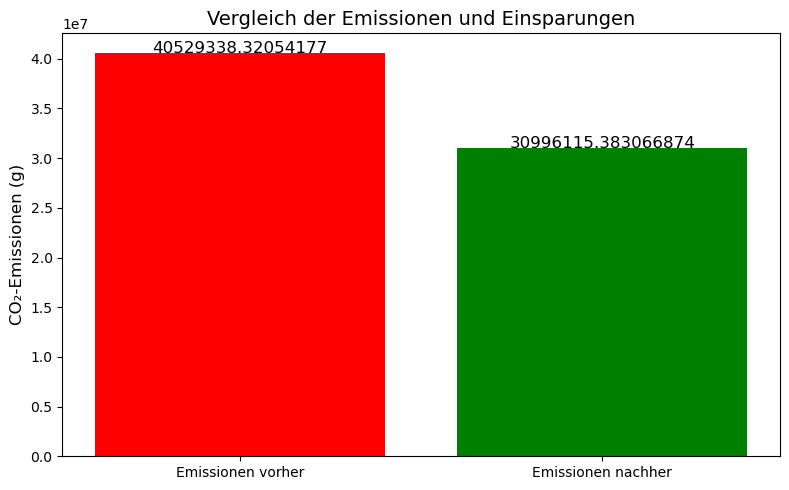

In [110]:
import matplotlib.pyplot as plt

# Daten für das Diagramm
labels = ["Emissionen vorher", "Emissionen nachher"]
values = [summe_alt, summe_neu]
colors = ["red", "green", "blue"]

# Balkendiagramm erstellen
plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=colors)
plt.ylabel("CO₂-Emissionen (g)", fontsize=12)
plt.title("Vergleich der Emissionen und Einsparungen", fontsize=14)

# Werte anzeigen
for i, value in enumerate(values):
    plt.text(i, value + 200, f"{value}", ha="center", fontsize=12)

plt.tight_layout()
plt.show()

In [111]:
# Gruppierung nach HHNR, Wegnummer und Wohnort: Kanton
grouped = (
    etappen_freizeit_erweitert.groupby(["HHNR", "Wegnummer", "Wohnort: Kanton"])
    .sum(numeric_only=True)
    .reset_index()
)

# Durchschnittliche Emissionen pro Kanton berechnen
avg_emissions_per_canton = (
    grouped.groupby("Wohnort: Kanton")[["Emissionen", "neue_emissionen"]]
    .mean()
    .reset_index()
)

# Berechnung der Einsparung in % je Kanton
avg_emissions_per_canton["Einsparung (%)"] = (
    (
        avg_emissions_per_canton["Emissionen"]
        - avg_emissions_per_canton["neue_emissionen"]
    )
    / avg_emissions_per_canton["Emissionen"]
    * 100
)

print("Durchschnittliche Emissionen und Einsparungen pro Kanton:")
print(avg_emissions_per_canton)

Durchschnittliche Emissionen und Einsparungen pro Kanton:
           Wohnort: Kanton   Emissionen  neue_emissionen  Einsparung (%)
0                   Aargau  1117.646623       851.303475       23.830712
1   Appenzell Ausserrhoden  1567.787033      1353.302177       13.680739
2    Appenzell Innerrhoden   594.988912       482.159801       18.963229
3               Basel-Land   907.208282       747.083906       17.650233
4              Basel-Stadt   481.406005       330.196361       31.410004
5                     Bern  1115.942579       871.508033       21.903864
6                 Fribourg  1352.981949      1011.344281       25.250719
7                   Genève   716.918635       536.487950       25.167526
8                   Glarus   710.318080       542.154534       23.674400
9               Graubünden  1167.385834       863.746169       26.010224
10                    Jura  1292.111628       990.551369       23.338561
11                  Luzern  1153.119100       906.643277       21.

In [ ]:
grouped["Wegzweck"].value_counts()

8.0     36629
16.0      495
24.0       35
32.0       10
40.0        3
Name: Wegzweck, dtype: int64

In [113]:
# Merge mit wege_freizeit_erweitert auf HHNR und Wegnummer (nur neue_emissionen)
wege_freizeit_erweitert = wege_freizeit_erweitert.merge(
    etappen_freizeit_erweitert[["HHNR", "Wegnummer", "neue_emissionen"]],
    on=["HHNR", "Wegnummer"],
)

In [114]:
# Durchschnitt je Freizeitaktivität berechnen
avg_emissions_per_activity = wege_freizeit_erweitert.groupby(
    "Freizeitaktivität", as_index=False
).agg({"Emissionen": "mean", "neue_emissionen": "mean"})

# Einsparung in % berechnen
avg_emissions_per_activity["Einsparung (%)"] = (
    (
        avg_emissions_per_activity["Emissionen"]
        - avg_emissions_per_activity["neue_emissionen"]
    )
    / avg_emissions_per_activity["Emissionen"]
    * 100
)

avg_emissions_per_activity

,Freizeitaktivität,Emissionen,neue_emissionen,Einsparung (%)
0,Aktiver Sport,958.402951,722.751254,24.587956
1,"Ausflug, Ferien",9345.774465,7876.491907,15.721357
2,Besuche,2199.999895,1635.139947,25.675453
3,Einkaufsbummel / Shopping,1603.055682,914.996647,42.921718
4,Essen ohne Gastronomiebesuch,1180.367027,1064.584026,9.809068
5,Gastronomiebesuch,1111.907150,788.628472,29.074251
6,Häusliche Freizeitaktivitäten auswärts,644.203452,480.906818,25.348612
7,"Kulturveranstaltungen, Freizeitanlagen",1564.969423,1017.749767,34.966795
8,Medizin/Wellness/Fitness,1213.488773,747.089768,38.434555
9,Nicht-sportliche Aussenaktivität,257.076796,171.327561,33.355494


### Regressionsanalyse anhand Typologie

In [115]:
# Einlesen GeoPackage
path_to_gpkg = "Data/gemeindetypen_2056.gpkg"  # Pfad zur Datei
layer_name = "ARE_GemTyp00_9"  # Layer-Name aus dem GeoPackage
new_gpkg_data = gpd.read_file(path_to_gpkg, layer=layer_name)

In [ ]:
# Wohnort-Koordinaten in Geometrie umwandeln
wege_freizeit_erweitert["geometry"] = gpd.points_from_xy(
    wege_freizeit_erweitert["Wohnort X-Koordinate"],
    wege_freizeit_erweitert["Wohnort Y-Koordinate"],
)

# GeoDataFrame erstellen
wege_freizeit_erweitert_geo = gpd.GeoDataFrame(
    wege_freizeit_erweitert, geometry="geometry"
)

# CRS setzen (falls Koordinaten WGS84 sind)
wege_freizeit_erweitert_geo = wege_freizeit_erweitert_geo.set_crs("EPSG:4326")  # WGS84

# Transformiere die Wohnort-Daten ins Koordinatensystem des GeoPackage-Datensatzes
wege_freizeit_erweitert_geo = wege_freizeit_erweitert_geo.to_crs(new_gpkg_data.crs)

In [ ]:
# Räumlicher Join
result = gpd.sjoin(
    wege_freizeit_erweitert_geo, new_gpkg_data, how="left", predicate="within"
)

# "NAME"-Spalte hinzufügen
wege_freizeit_erweitert_geo["Typologie"] = result["NAME"]

In [120]:
wege_freizeit_erweitert_geo

,HHNR,Wegnummer,Distanz_km,Emissionen,Verkehrsmittel,Etappennummer,Verkehrsmittel_first,Zweck,Distanz_km_first,Start_X,...,Führerausweis_Motorrad,Start_X-Koordinate_y,Start_Y-Koordinate_y,Ziel_X-Koordinate_y,Ziel_Y-Koordinate_y,Distanz_zur_Haltestelle_km_Start,Distanz_zur_Haltestelle_km_Ziel,neue_emissionen,geometry,Typologie
0,110001,4,3.973,512.210270,Auto,4,Auto,8,3.973,6.559870,...,True,6.559870,46.549366,6.552598,46.568205,0.327631,0.320073,512.210270,POINT (2532603.686 1155720.523),Gürtel der Grosszentren
1,110001,6,0.404,52.084810,Auto,6,Auto,8,0.404,6.554009,...,True,6.554009,46.540095,6.554009,46.540095,0.188274,0.188274,10.261600,POINT (2532603.686 1155720.523),Gürtel der Grosszentren
2,110008,1,5.778,0.000000,Zu Fuss,1,Zu Fuss,8,5.778,6.635652,...,True,6.635652,46.785591,6.635652,46.785591,0.162703,0.162703,0.000000,POINT (2538684.747 1181917.182),Mittelzentren
3,110008,4,3.262,0.000000,Zu Fuss,4,Zu Fuss,8,3.262,6.635652,...,True,6.635652,46.785591,6.635652,46.785591,0.162703,0.162703,0.000000,POINT (2538684.747 1181917.182),Mittelzentren
4,110011,1,0.556,0.000000,Zu Fuss,1,Zu Fuss,8,0.556,9.112485,...,False,9.112485,47.451677,9.112485,47.451677,0.219447,0.219447,0.000000,POINT (2726226.635 1257000.523),Gürtel der Mittelzentren
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37774,459971,1,14.000,0.000000,Zu Fuss,1,Zu Fuss,8,14.000,7.294728,...,False,7.294728,46.183483,7.294728,46.183483,0.041724,0.041724,0.000000,POINT (2526994.977 1152028.050),Nebenzentren der Grosszentren
37775,459976,3,1.852,387.917463,Auto,5,Auto,8,1.852,7.577385,...,False,7.577385,47.560109,7.573720,47.554275,0.022046,0.276308,387.917463,POINT (2691418.775 1286331.078),Mittelzentren
37776,459981,2,0.067,0.000000,Zu Fuss,4,Zu Fuss,8,0.067,9.025833,...,True,9.025833,46.193579,9.026348,46.193224,0.098310,0.166477,0.000000,POINT (2719646.954 1084788.966),Mittelzentren
37777,459981,7,22.757,2866.985148,"Auto, Zu Fuss",11,Auto,8,22.238,8.980385,...,True,8.980385,45.904131,8.964244,46.027417,0.115728,0.077634,564.845200,POINT (2719646.954 1084788.966),Mittelzentren


In [ ]:
wege_freizeit_erweitert_geo["Typologie"].value_counts()

Gürtel der Mittelzentren          8283
Mittelzentren                     7517
Gürtel der Grosszentren           5760
Grosszentren                      4751
Periurbane ländliche Gemeinden    4592
Nebenzentren der Grosszentren     3121
Agrargemeinden                    2348
Kleinzentren                       797
Touristische Gemeinden             610
Name: Typologie, dtype: int64

In [121]:
# Referenzkategorie definieren
reference_category = "Grosszentren"

# Dummy-Variablen erstellen
dummy_data = pd.get_dummies(wege_freizeit_erweitert_geo["Typologie"], drop_first=False)

# Referenzkategorie entfernen
dummy_data = dummy_data.drop(columns=[reference_category])

In [124]:
# Zielvariable und Prädiktoren definieren
X = dummy_data  # Dummy-Variablen außer der Referenz
y = wege_freizeit_erweitert_geo["Emissionen"]

# Konstanten-Term hinzufügen (Intercept)
X = sm.add_constant(X)

# Regression durchführen
model = sm.OLS(y, X).fit()

# Ergebnisse anzeigen
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Emissionen   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.983
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           3.42e-06
Time:                        14:05:19   Log-Likelihood:            -3.7872e+05
No. Observations:               37779   AIC:                         7.575e+05
Df Residuals:                   37770   BIC:                         7.575e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

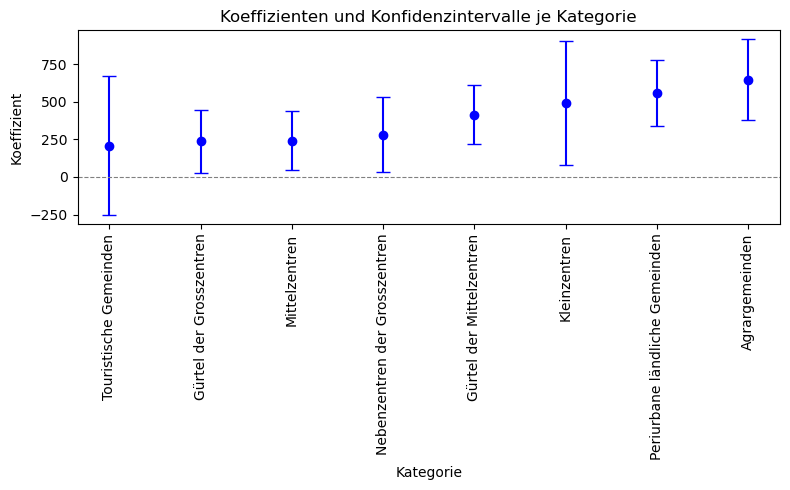

In [125]:
# Koeffizienten und Konfidenzintervalle extrahieren
coefficients = model.params
conf_int = model.conf_int()
conf_int.columns = ["lower", "upper"]

# Daten vorbereiten
coef_df = pd.DataFrame(
    {
        "category": coefficients.index,
        "coefficient": coefficients.values,
        "lower": conf_int["lower"].values,
        "upper": conf_int["upper"].values,
    }
)

# Nur Dummy-Variablen plotten (ohne den Intercept)
coef_df = coef_df[coef_df["category"] != "const"]

# Sortiere nach Koeffizienten aufsteigend
coef_df = coef_df.sort_values("coefficient")

# Plot erstellen
plt.figure(figsize=(8, 5))
plt.errorbar(
    coef_df["category"],
    coef_df["coefficient"],
    yerr=[
        coef_df["coefficient"] - coef_df["lower"],
        coef_df["upper"] - coef_df["coefficient"],
    ],
    fmt="o",
    capsize=5,
    color="blue",
    label="Koeffizienten mit Konfidenzintervallen",
)

plt.axhline(0, color="gray", linestyle="--", linewidth=0.8)  # Null-Linie
plt.xticks(rotation=90)
plt.xlabel("Kategorie")
plt.ylabel("Koeffizient")
plt.title("Koeffizienten und Konfidenzintervalle je Kategorie")
plt.tight_layout()
plt.show()